In [90]:
import pandas as pd
from fredapi import Fred
import sys
import os
import matplotlib.pyplot as plt
import scipy.stats as st

# Add config module to sys path
sys.path.insert(0, os.path.abspath('../config'))

# Import API key
from api_keys import fred_api_key


In [92]:
#Set up API Key
fred = Fred(api_key=f'{fred_api_key}')

In [94]:
#retrieve 30 year mortgage rates from FRED API
data_30year_mortgage = fred.get_series('MORTGAGE30US')

In [96]:
data_30year_mortgage.tail()

2023-11-16    7.44
2023-11-22    7.29
2023-11-30    7.22
2023-12-07    7.03
2023-12-14    6.95
dtype: float64

In [98]:
print(data_30year_mortgage.dtypes)
print(type(data_30year_mortgage))

float64
<class 'pandas.core.series.Series'>


In [100]:
#filter by date
data_30year_mortage_rates_10years = data_30year_mortgage.loc[(data_30year_mortgage.index > '2012-12-31') & 
                                                             (data_30year_mortgage.index < '2023-01-01') ]
data_30year_mortage_rates_10years

2013-01-03    3.34
2013-01-10    3.40
2013-01-17    3.38
2013-01-24    3.42
2013-01-31    3.53
              ... 
2022-12-01    6.49
2022-12-08    6.33
2022-12-15    6.31
2022-12-22    6.27
2022-12-29    6.42
Length: 522, dtype: float64

In [102]:
#creating data frame for 30 year mortgage rates 
dfMortageRates = pd.DataFrame(data_30year_mortage_rates_10years)
dfMortageRates.reset_index()
dfMortageRates = dfMortageRates.rename(columns={0 : '30 Year Mortgage Rates'})
dfMortageRates.index.names = ['Date']
dfMortageRates.index = pd.to_datetime(dfMortageRates.index)
print(dfMortageRates.tail())
print(dfMortageRates.dtypes)

            30 Year Mortgage Rates
Date                              
2022-12-01                    6.49
2022-12-08                    6.33
2022-12-15                    6.31
2022-12-22                    6.27
2022-12-29                    6.42
30 Year Mortgage Rates    float64
dtype: object


In [104]:
#reset index and converting date column to datetime 64
dfMortageRates = dfMortageRates.reset_index()

dfMortageRates['Date'] = pd.to_datetime(dfMortageRates['Date'])

dfMortageRates['Year'] = dfMortageRates['Date'].dt.year
print(dfMortageRates.dtypes)
print(dfMortageRates.head())

Date                      datetime64[ns]
30 Year Mortgage Rates           float64
Year                               int32
dtype: object
        Date  30 Year Mortgage Rates  Year
0 2013-01-03                    3.34  2013
1 2013-01-10                    3.40  2013
2 2013-01-17                    3.38  2013
3 2013-01-24                    3.42  2013
4 2013-01-31                    3.53  2013


In [106]:
#create data frame with mean of 30 year mortgage rates by year
dfMortageRates = dfMortageRates.groupby('Year')['30 Year Mortgage Rates'].mean()
dfMortageRates_ = pd.DataFrame(dfMortageRates)
dfMortageRates_

,30 Year Mortgage Rates
Year,
2013,3.975577
2014,4.168868
2015,3.850577
2016,3.654038
2017,3.989808
2018,4.544615
2019,3.935769
2020,3.111698
2021,2.957692


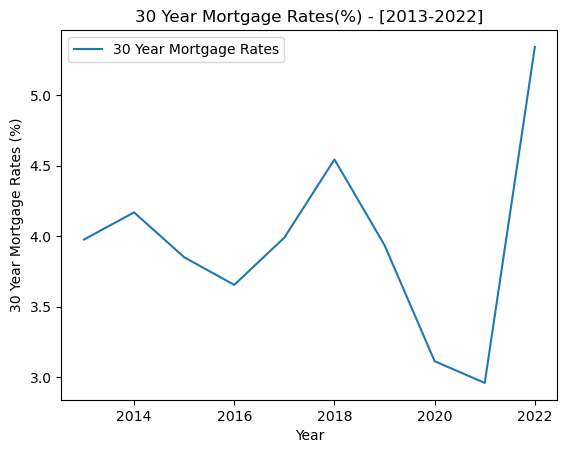

In [108]:
#generating line plot of 30 year mortgage rates
dfMortageRates_.plot(y='30 Year Mortgage Rates', kind='line', use_index=True)
plt.xlabel('Year')
plt.ylabel('30 Year Mortgage Rates (%)')
plt.title('30 Year Mortgage Rates(%) - [2013-2022]')
plt.show()

In [110]:

# Read Zillow Data - full dataset

dfZillow = pd.read_csv("../Resources/ZILLOW_DATA.csv")

In [112]:
# Read Regions dataset

dfRegions = pd.read_csv("../Resources/ZILLOW_REGIONS.csv")

In [114]:
dfIndicators = pd.read_csv("../Resources/ZILLOW_INDICATORS.csv")

In [116]:
# Indicator ID SSAM - Median Sale Price (Smooth, All Homes, Monthly)",Inventory and sales

dfZillow = dfZillow.loc[dfZillow['indicator_id'] == 'SSAM', :]


In [118]:
#creating data frame by merging regions and zillow data frames on region id column
dfMedianSalesPrice = pd.merge(dfZillow, dfRegions, on='region_id')


In [120]:
dfMedianSalesPrice.head()

,indicator_id,region_id,date,value,region_type,region
0,SSAM,394521,2020-05-31,153000.0,metro,"Dayton, OH"
1,SSAM,394521,2020-03-31,137583.0,metro,"Dayton, OH"
2,SSAM,394521,2020-02-29,134450.0,metro,"Dayton, OH"
3,SSAM,394521,2020-09-30,166800.0,metro,"Dayton, OH"
4,SSAM,394521,2020-11-30,160233.0,metro,"Dayton, OH"


In [122]:
len(dfMedianSalesPrice.index)

127585

In [124]:
print(dfMedianSalesPrice['date'].min())
print(dfMedianSalesPrice['date'].max())

2008-02-29
2023-09-30


In [126]:
#Identify unique for region_type
dfMedianSalesPrice['region_type'].unique()

array(['metro'], dtype=object)

In [128]:
print(len(dfMedianSalesPrice['region'].unique()))

810


In [130]:
#add the state column
dfMedianSalesPrice['state'] = dfMedianSalesPrice['region'].str.split(',',n=1,expand=True)[1].str.strip(' ')
dfMedianSalesPrice.head()


,indicator_id,region_id,date,value,region_type,region,state
0,SSAM,394521,2020-05-31,153000.0,metro,"Dayton, OH",OH
1,SSAM,394521,2020-03-31,137583.0,metro,"Dayton, OH",OH
2,SSAM,394521,2020-02-29,134450.0,metro,"Dayton, OH",OH
3,SSAM,394521,2020-09-30,166800.0,metro,"Dayton, OH",OH
4,SSAM,394521,2020-11-30,160233.0,metro,"Dayton, OH",OH


In [131]:
#filtering by state
dfMedianSalesPrice = dfMedianSalesPrice.loc[dfMedianSalesPrice['state'] == 'OK', :]

dfMedianSalesPrice.head()

,indicator_id,region_id,date,value,region_type,region,state
400,SSAM,394564,2022-08-31,154167.0,metro,"Elk City, OK",OK
401,SSAM,394564,2022-07-31,159667.0,metro,"Elk City, OK",OK
402,SSAM,394564,2022-06-30,153667.0,metro,"Elk City, OK",OK
403,SSAM,394564,2022-05-31,160000.0,metro,"Elk City, OK",OK
404,SSAM,394564,2023-02-28,162125.0,metro,"Elk City, OK",OK


In [132]:
#add region column to contain only city
dfMedianSalesPrice['region']=dfMedianSalesPrice['region'].str.split(',',n=1,expand=True)[0].str.strip(' ')
dfMedianSalesPrice.head()


,indicator_id,region_id,date,value,region_type,region,state
400,SSAM,394564,2022-08-31,154167.0,metro,Elk City,OK
401,SSAM,394564,2022-07-31,159667.0,metro,Elk City,OK
402,SSAM,394564,2022-06-30,153667.0,metro,Elk City,OK
403,SSAM,394564,2022-05-31,160000.0,metro,Elk City,OK
404,SSAM,394564,2023-02-28,162125.0,metro,Elk City,OK


In [133]:
print(len(dfMedianSalesPrice.index))

2614


In [134]:
#converting column to datetime64
dfMedianSalesPrice['date'] = pd.to_datetime(dfMedianSalesPrice['date'])

In [135]:
dfMedianSalesPrice.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
state                   object
dtype: object

In [136]:
#filtering by the date
dfMedianSalesPrice = dfMedianSalesPrice.loc[ (dfMedianSalesPrice['date'].dt.year > 2012) & (dfMedianSalesPrice['date'].dt.year < 2023), :]
dfMedianSalesPrice.tail()

,indicator_id,region_id,date,value,region_type,region,state
127072,SSAM,395236,2022-08-31,156250.0,metro,Woodward,OK
127073,SSAM,395236,2022-09-30,144125.0,metro,Woodward,OK
127074,SSAM,395236,2022-10-31,132375.0,metro,Woodward,OK
127075,SSAM,395236,2022-11-30,130500.0,metro,Woodward,OK
127076,SSAM,395236,2022-12-31,129750.0,metro,Woodward,OK


In [137]:
#creating median sales price by year
median_sales_price_by_year = []
for i in range(2013, 2023):
    dfMedianSalesPrice_temp = dfMedianSalesPrice.loc[dfMedianSalesPrice['date'].dt.year == i,:]
    median_sales_price_by_year.append(dfMedianSalesPrice_temp.groupby("region")["value"].mean())

In [138]:
median_sales_price_by_year

[region
 Ardmore          105885.416667
 Bartlesville     109200.000000
 Duncan            78541.666667
 Enid             106166.666667
 Lawton            99145.833333
 McAlester         86375.000000
 Muskogee          83992.166667
 Oklahoma City    120593.750000
 Shawnee           87177.750000
 Stillwater       125322.916667
 Tahlequah         94248.083333
 Tulsa            126729.166667
 Name: value, dtype: float64,
 region
 Ada              100750.000000
 Ardmore          114812.500000
 Bartlesville     116479.416667
 Duncan            81052.083333
 Durant           109100.000000
 Enid             106145.833333
 Lawton            99962.500000
 McAlester         84989.583333
 Miami             64000.000000
 Muskogee          89962.500000
 Oklahoma City    126735.500000
 Ponca City        79787.083333
 Shawnee           87533.333333
 Stillwater       132493.750000
 Tahlequah         93458.333333
 Tulsa            130095.833333
 Name: value, dtype: float64,
 region
 Ada               9

In [139]:
#create data frame with region column
median_sales_by_metro = pd.DataFrame(dfMedianSalesPrice['region'].unique())

median_sales_by_metro = median_sales_by_metro.rename(columns= {0 : 'region'})

median_sales_by_metro = median_sales_by_metro.set_index('region')

median_sales_by_metro

""
region
Elk City
Tahlequah
Tulsa
Ardmore
Oklahoma City
Lawton
Shawnee
Enid
Bartlesville


In [140]:
#creating median sales by metro
year = 2013
for median_sales in median_sales_price_by_year:
    print(median_sales)
    median_sales_by_metro[year] = median_sales
    year += 1

region
Ardmore          105885.416667
Bartlesville     109200.000000
Duncan            78541.666667
Enid             106166.666667
Lawton            99145.833333
McAlester         86375.000000
Muskogee          83992.166667
Oklahoma City    120593.750000
Shawnee           87177.750000
Stillwater       125322.916667
Tahlequah         94248.083333
Tulsa            126729.166667
Name: value, dtype: float64
region
Ada              100750.000000
Ardmore          114812.500000
Bartlesville     116479.416667
Duncan            81052.083333
Durant           109100.000000
Enid             106145.833333
Lawton            99962.500000
McAlester         84989.583333
Miami             64000.000000
Muskogee          89962.500000
Oklahoma City    126735.500000
Ponca City        79787.083333
Shawnee           87533.333333
Stillwater       132493.750000
Tahlequah         93458.333333
Tulsa            130095.833333
Name: value, dtype: float64
region
Ada               99953.166667
Ardmore          116666.

In [141]:
median_sales_by_metro

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
region,,,,,,,,,,
Elk City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156875.250000
Tahlequah,94248.083333,93458.333333,96865.250000,96349.750000,102850.000000,113833.333333,118762.500000,140495.833333,160687.500000,166408.333333
Tulsa,126729.166667,130095.833333,136604.166667,138558.916667,147541.666667,150326.083333,158052.083333,178756.250000,199658.333333,218666.666667
Ardmore,105885.416667,114812.500000,116666.666667,115675.916667,113291.666667,130758.750000,123864.333333,146083.333333,178337.083333,173200.000000
Oklahoma City,120593.750000,126735.500000,137262.500000,141998.625000,147336.666667,150141.666667,163937.500000,177729.166667,192583.333333,216000.000000
Lawton,99145.833333,99962.500000,95693.041667,88843.708333,98197.916667,110439.583333,123520.833333,132000.000000,132833.333333,139287.500000
Shawnee,87177.750000,87533.333333,93770.833333,99940.333333,111162.500000,105708.333333,118979.166667,137787.500000,149354.166667,153462.500000
Enid,106166.666667,106145.833333,115595.000000,119927.083333,111354.166667,115562.500000,124104.166667,136997.916667,134685.416667,140912.500000
Bartlesville,109200.000000,116479.416667,108908.500000,111770.833333,120160.583333,114303.166667,124897.916667,126093.750000,148614.583333,161245.833333


In [142]:
median_sales_by_metro.isna().sum()

2013    8
2014    4
2015    4
2016    4
2017    4
2018    4
2019    3
2020    1
2021    1
2022    0
dtype: int64

In [143]:
len(median_sales_by_metro.index.unique())

20

In [144]:
#find unique metro index
median_sales_by_metro.index.unique()

Index(['Elk City', 'Tahlequah', 'Tulsa', 'Ardmore', 'Oklahoma City', 'Lawton',
       'Shawnee', 'Enid', 'Bartlesville', 'Muskogee', 'McAlester',
       'Stillwater', 'Duncan', 'Durant', 'Ponca City', 'Ada', 'Miami', 'Altus',
       'Weatherford', 'Woodward'],
      dtype='object', name='region')

In [145]:
# Missing data for certain metros
median_sales_by_metro = median_sales_by_metro.dropna()

In [146]:
median_sales_by_metro.isna().sum()

2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [147]:
#find unique metros
median_sales_by_metro.index.unique()

Index(['Tahlequah', 'Tulsa', 'Ardmore', 'Oklahoma City', 'Lawton', 'Shawnee',
       'Enid', 'Bartlesville', 'Muskogee', 'McAlester', 'Stillwater',
       'Duncan'],
      dtype='object', name='region')

In [148]:
median_sales_by_metro

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
region,,,,,,,,,,
Tahlequah,94248.083333,93458.333333,96865.250000,96349.750000,102850.000000,113833.333333,118762.500000,140495.833333,160687.500000,166408.333333
Tulsa,126729.166667,130095.833333,136604.166667,138558.916667,147541.666667,150326.083333,158052.083333,178756.250000,199658.333333,218666.666667
Ardmore,105885.416667,114812.500000,116666.666667,115675.916667,113291.666667,130758.750000,123864.333333,146083.333333,178337.083333,173200.000000
Oklahoma City,120593.750000,126735.500000,137262.500000,141998.625000,147336.666667,150141.666667,163937.500000,177729.166667,192583.333333,216000.000000
Lawton,99145.833333,99962.500000,95693.041667,88843.708333,98197.916667,110439.583333,123520.833333,132000.000000,132833.333333,139287.500000
Shawnee,87177.750000,87533.333333,93770.833333,99940.333333,111162.500000,105708.333333,118979.166667,137787.500000,149354.166667,153462.500000
Enid,106166.666667,106145.833333,115595.000000,119927.083333,111354.166667,115562.500000,124104.166667,136997.916667,134685.416667,140912.500000
Bartlesville,109200.000000,116479.416667,108908.500000,111770.833333,120160.583333,114303.166667,124897.916667,126093.750000,148614.583333,161245.833333
Muskogee,83992.166667,89962.500000,93512.500000,92375.000000,88995.833333,92452.083333,108270.833333,117333.333333,134358.333333,146083.333333


In [149]:
#create data frame that contains region column
median_sales_diff_by_metro = pd.DataFrame(median_sales_by_metro.index)

median_sales_diff_by_metro = median_sales_diff_by_metro.rename(columns= {0 : 'region'})

median_sales_diff_by_metro = median_sales_diff_by_metro.set_index('region')

median_sales_diff_by_metro

""
region
Tahlequah
Tulsa
Ardmore
Oklahoma City
Lawton
Shawnee
Enid
Bartlesville
Muskogee


In [150]:
#create median sales difference by metro 
start_year = 2014
end_year = 2023
for i in range(2014, 2023):
    median_sales_diff_by_metro[i] = ((median_sales_by_metro[i] - median_sales_by_metro[i -1]) / median_sales_by_metro[i-1]) * 100

median_sales_diff_by_metro


,2014,2015,2016,2017,2018,2019,2020,2021,2022
region,,,,,,,,,
Tahlequah,-0.837948,3.645386,-0.532183,6.746515,10.678982,4.330161,18.299828,14.371719,3.560223
Tulsa,2.656584,5.002722,1.430959,6.482982,1.887207,5.139494,13.099585,11.693064,9.520431
Ardmore,8.430890,1.614952,-0.849214,-2.061146,15.417801,-5.272624,17.938174,22.079007,-2.880547
Oklahoma City,5.092926,8.306276,3.450414,3.759221,1.903803,9.188544,8.412759,8.357754,12.159238
Lawton,0.823702,-4.271060,-7.157609,10.528836,12.466320,11.844711,6.864564,0.631313,4.858846
Shawnee,0.407883,7.125857,6.579338,11.228867,-4.906481,12.554198,15.808090,8.394569,2.750732
Enid,-0.019623,8.902061,3.747639,-7.148441,3.779233,7.391383,10.389458,-1.687982,4.623428
Bartlesville,6.666132,-6.499789,2.628200,7.506207,-4.874657,9.268991,0.957449,17.860388,8.499334
Muskogee,7.108203,3.946089,-1.216415,-3.658097,3.883609,17.110215,8.370214,14.509943,8.726664


In [151]:
#create median sales by year
median_sales_by_year = median_sales_diff_by_metro.T

median_sales_by_year.index.name = 'year'

median_sales_by_year


region,Tahlequah,Tulsa,Ardmore,Oklahoma City,Lawton,Shawnee,Enid,Bartlesville,Muskogee,McAlester,Stillwater,Duncan
year,,,,,,,,,,,,
2014,-0.837948,2.656584,8.430890,5.092926,0.823702,0.407883,-0.019623,6.666132,7.108203,-1.603956,5.721885,3.196286
2015,3.645386,5.002722,1.614952,8.306276,-4.271060,7.125857,8.902061,-6.499789,3.946089,3.321485,-0.542478,-0.025704
2016,-0.532183,1.430959,-0.849214,3.450414,-7.157609,6.579338,3.747639,2.628200,-1.216415,15.207687,14.891229,10.309808
2017,6.746515,6.482982,-2.061146,3.759221,10.528836,11.228867,-7.148441,7.506207,-3.658097,1.626770,1.292125,-6.712504
2018,10.678982,1.887207,15.417801,1.903803,12.466320,-4.906481,3.779233,-4.874657,3.883609,1.997974,1.418286,6.645846
2019,4.330161,5.139494,-5.272624,9.188544,11.844711,12.554198,7.391383,9.268991,17.110215,13.556898,8.018325,-3.010425
2020,18.299828,13.099585,17.938174,8.412759,6.864564,15.808090,10.389458,0.957449,8.370214,16.179146,5.310020,19.584541
2021,14.371719,11.693064,22.079007,8.357754,0.631313,8.394569,-1.687982,17.860388,14.509943,14.950006,6.356421,10.491234
2022,3.560223,9.520431,-2.880547,12.159238,4.858846,2.750732,4.623428,8.499334,8.726664,8.131157,5.070859,9.373113


In [152]:
#Create max returns per year
max_median_sales = []

for index, row in median_sales_by_year.iterrows():
     max_median_sales.append({ 'year' : index, 'region' : row.idxmax(), 'change' : row.max()})

max_returns_per_year = pd.DataFrame(max_median_sales)

max_returns_per_year


,year,region,change
0,2014,Ardmore,8.430890
1,2015,Enid,8.902061
2,2016,McAlester,15.207687
3,2017,Shawnee,11.228867
4,2018,Ardmore,15.417801
5,2019,Muskogee,17.110215
6,2020,Duncan,19.584541
7,2021,Ardmore,22.079007
8,2022,Oklahoma City,12.159238


In [153]:
#Create low returns per year
low_median_sales = []

for index, row in median_sales_by_year.iterrows():
     low_median_sales.append({ 'year' : index, 'region' : row.idxmin(), 'change' : row.min()})

low_returns_per_year = pd.DataFrame(low_median_sales)

low_returns_per_year

,year,region,change
0,2014,McAlester,-1.603956
1,2015,Bartlesville,-6.499789
2,2016,Lawton,-7.157609
3,2017,Enid,-7.148441
4,2018,Shawnee,-4.906481
5,2019,Ardmore,-5.272624
6,2020,Bartlesville,0.957449
7,2021,Enid,-1.687982
8,2022,Ardmore,-2.880547


In [154]:
#Create avg median sales dataframe
average_median_sales_df = pd.DataFrame(median_sales_diff_by_metro.mean())
average_median_sales_df = average_median_sales_df.rename(columns= {0 : 'Change in Median Sales Price (%)'})
average_median_sales_df.index.name = 'Year'
average_median_sales_df

,Change in Median Sales Price (%)
Year,
2014,3.136914
2015,2.543816
2016,4.040821
2017,2.465944
2018,4.191494
2019,7.509989
2020,11.767819
2021,10.667286
2022,6.199456


In [155]:
#create avg change in median sales price and 30 year mortgage rates data frame 
average_median_sales_mortgage_rates_df = pd.merge(dfMortageRates_, average_median_sales_df, on="Year")
average_median_sales_mortgage_rates_df

,30 Year Mortgage Rates,Change in Median Sales Price (%)
Year,,
2014,4.168868,3.136914
2015,3.850577,2.543816
2016,3.654038,4.040821
2017,3.989808,2.465944
2018,4.544615,4.191494
2019,3.935769,7.509989
2020,3.111698,11.767819
2021,2.957692,10.667286
2022,5.344038,6.199456


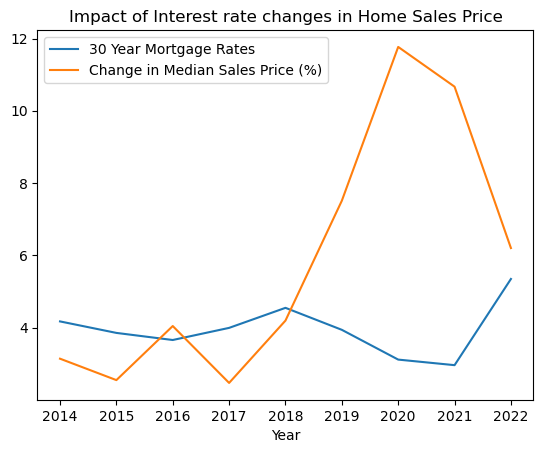

In [156]:
#generate line plot for 30 year mortgage rates and change in median sales price
average_median_sales_mortgage_rates_df.plot(kind='line')
plt.title('Impact of Interest rate changes in Home Sales Price')

plt.savefig('../output/interest_rate_change_median_sales_price.png')

plt.show()


In [157]:
correlation =  st.pearsonr(average_median_sales_mortgage_rates_df['30 Year Mortgage Rates'], average_median_sales_mortgage_rates_df['Change in Median Sales Price (%)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
print("Hence we can conclude that interest rate and change in median sales price are inversely correlated.")

The correlation between both factors is -0.51
Hence we can conclude that interest rate and change in median sales price are inversely correlated.


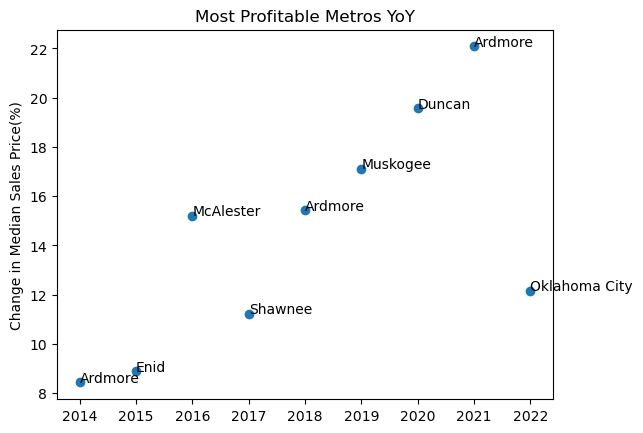

In [158]:
#create scatter plot for most profitable metros year over year
plt.scatter(max_returns_per_year['year'],max_returns_per_year['change'],marker='o',linestyle='-')

plt.title('Most Profitable Metros YoY')
plt.ylabel('Change in Median Sales Price(%)')

for index, row in max_returns_per_year.iterrows():
    plt.annotate(row['region'], (row['year'], row['change']))

plt.savefig('../output/most_profitable_metros_yoy.png')

plt.show()

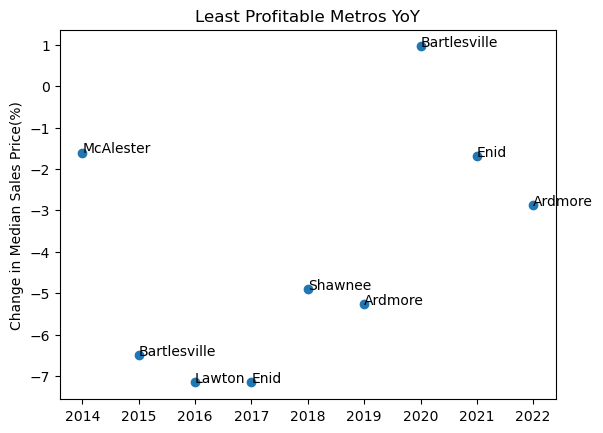

In [159]:
#create scatter plot for least profitable metros
plt.scatter(low_returns_per_year['year'],low_returns_per_year['change'],marker='o',linestyle='-')

plt.title('Least Profitable Metros YoY')
plt.ylabel('Change in Median Sales Price(%)')

for index, row in low_returns_per_year.iterrows():
    plt.annotate(row['region'], (row['year'], row['change']))

#plt.figure(figsize=(35,10))

plt.savefig('../output/least_profitable_metros_yoy.png')

plt.show()

In [160]:
#generate line plot for median sales price change 
y_axis_tulsa = median_sales_by_year['Tulsa']
y_axis_okc = median_sales_by_year['Oklahoma City']
y_axis_ardmore = median_sales_by_year['Ardmore']

x_axis = y_axis_tulsa.index
print(x_axis)
print(y_axis_tulsa)

Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='year')
year
2014     2.656584
2015     5.002722
2016     1.430959
2017     6.482982
2018     1.887207
2019     5.139494
2020    13.099585
2021    11.693064
2022     9.520431
Name: Tulsa, dtype: float64


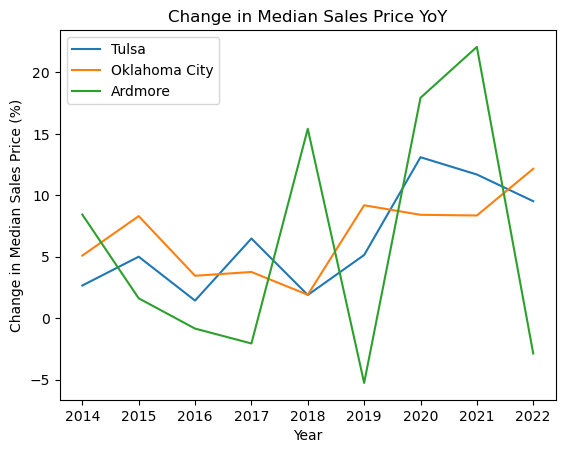

In [161]:
plt.plot(x_axis, y_axis_tulsa, label='Tulsa')
plt.plot(x_axis, y_axis_okc, label='Oklahoma City')
plt.plot(x_axis, y_axis_ardmore, label='Ardmore')

plt.title('Change in Median Sales Price YoY')
plt.xlabel('Year')
plt.ylabel('Change in Median Sales Price (%)')

plt.legend()


plt.savefig('../output/change_in_median_sales_price_major_cities.png')

plt.show()